Source and credit:
http://rasbt.github.io/mlxtend/

Inspired from the need of being able to print decision boundaries in a chart.

![enter image description here](https://i.stack.imgur.com/PbAVO.png)

Table of Contents:
___

1. [Setup](#Section1)<br>
2. [Ensemble Vote Classifier](#Section2)<br>
3. [Setup 2](#Section3)<br>
4. [Bagging](#Section4)<br>
5. [Boosting](#Section5)<br>
5. [Stacking](#Section6)<br>


<a id = Section1></a>
# 1. Set-up

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

X,y = iris_data()
X = X[:,[0,2]]

<a id = Section2></a>
# 2. Ensemble Vote Classifier

In [2]:
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state = 0)
clf3 = SVC(random_state=0, probability=True)
clf4 = EnsembleVoteClassifier(clfs = [clf1,clf2,clf3], weights = [2,1,1], voting = 'soft')


gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize = (10,8))

labels = ['Logistic Regression', 'Random Forest', 'RBF Kernel SVM', 'Ensemble']

<Figure size 720x576 with 0 Axes>

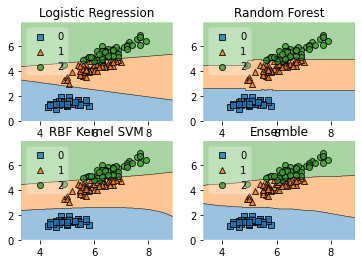

In [3]:
for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0,1], repeat = 2)):
    clf.fit(X,y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend = 2)
    plt.title(lab)
    
plt.show()

<a id = Section3></a>
# 3. Setup 2

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

<a id = Section4></a>
# 4. Bagging

In [5]:
iris = datasets.load_iris()
X, y = iris.data[:, 0:2], iris.target

print(X.shape)
print(y.shape)

clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators= 10, max_samples=0.8, max_features=0.8, n_jobs = -1)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators= 10, max_samples=0.8, max_features = 0.8, n_jobs = -1)

(150, 2)
(150,)


Accuracy: 0.62  (+- 0.05) [Decision Tree]
Accuracy: 0.73  (+- 0.08) [K-NN]
Accuracy: 0.69  (+- 0.07) [Bagging Tree]
Accuracy: 0.67  (+- 0.07) [Bagging K-NN]


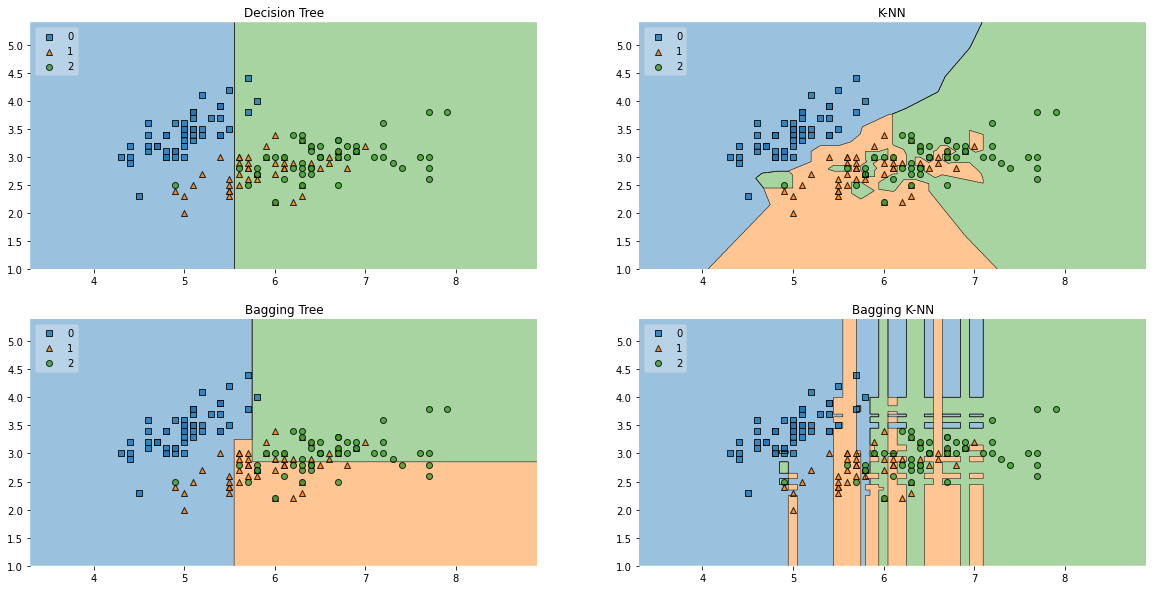

In [6]:
#Plotting the bagging output

label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

fig = plt.figure(figsize = (20,10))
gs = gridspec.GridSpec(2,2)
grid = itertools.product([0,1], repeat=2)

for clf, label, grd, in zip(clf_list, label, grid):
    scores = cross_val_score(clf, X, y, cv=10, scoring = 'accuracy')
    print('Accuracy: %.2f  (+- %.2f) [%s]' %(scores.mean(), scores.std(), label))
    
    clf.fit(X,y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X,y=y,clf=clf, legend=2)
    plt.title(label)
          

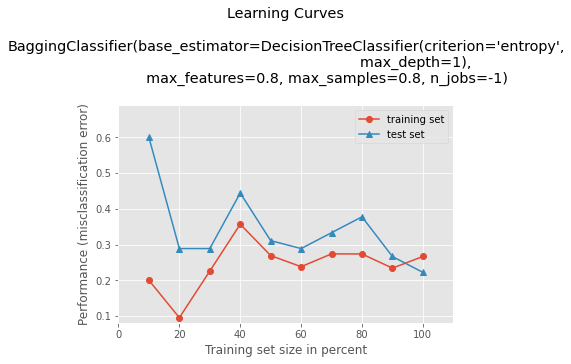

In [7]:
#plotting learning curves

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging1, style='ggplot');


Smallest gap between training and test errors occurs at 80% of the training set size.

In [8]:
#Defining the ensemble size

num_est = list(map(int, np.linspace(1,100,20)))
bg_clf_cv_mean = []
bg_clf_cv_std = []

for n_est in num_est:
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators= n_est, max_samples=0.8, max_features= 0.8)
    scores = cross_val_score(bg_clf, X, y, cv=10, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

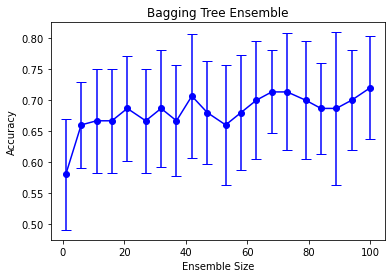

In [9]:
plt.figure()
(_, caps, _) = plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)

for cap in caps:
    cap.set_markeredgewidth(1)

plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
plt.show()

<a id = Section5></a>
# 5. Boosting

Refers to a family of algorithms, that are able to convert weak learners into strong learners. Fit a sequence of weak learners, to weighted versions of the data, more weight being given to examples that were misclassifed by earlier rounds. The predictions are then combined, through a weighted majority vote (classification) or a weighted sum (regression) to produce the final prediction.

The principle difference between boosting and committee methods such as bagging is that the base learners are trained in a sequence, on a weighted version of the data.

In [53]:
#using same dataset as previous

clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
num_est = [1,2,3,10]
label = ['Adaboost (n_est=1)', 'Adaboost (n_est=2)', 'Adaboost (n_est=3)', 'Adaboost (n_est=10)' ]

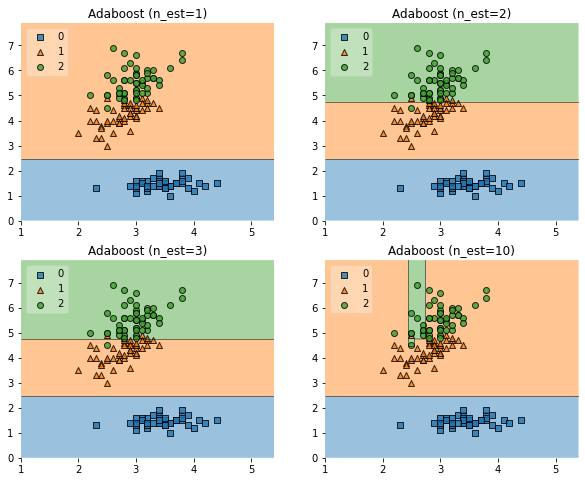

In [54]:
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2,2)

grid = itertools.product([0,1], repeat=2)

for n_est, label, grd in zip(num_est, label, grid):
    boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)
    boosting.fit(X,y)
    ax = plt.subplot(gs[grd[0],grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf = boosting, legend = 2)
    plt.title(label)



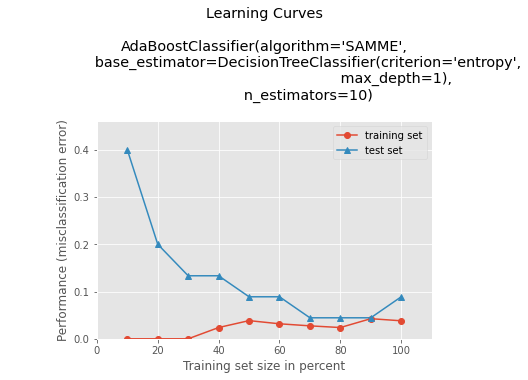

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
boosting = AdaBoostClassifier(base_estimator=clf, n_estimators= 10, algorithm='SAMME')

plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model=True, style='ggplot')
plt.show()

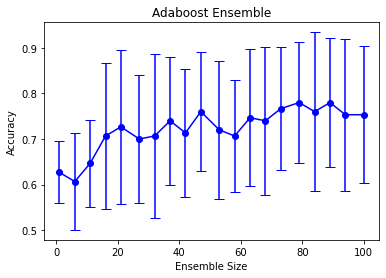

In [33]:
#Ensemble Size

num_est = list(map(int,np.linspace(1,100,20)))

bag_clf_cv_mean=[]
bag_clf_cv_std = []

for n_est in num_est:
    ada_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est, algorithm='SAMME')
    scores = cross_val_score(ada_clf, X,y, cv=15, scoring = 'accuracy')
    bag_clf_cv_mean.append(scores.mean())
    bag_clf_cv_std.append(scores.std())
    
plt.figure()
(__, caps, __) = plt.errorbar(num_est, bag_clf_cv_mean, yerr = bag_clf_cv_std, c = 'blue', fmt = '-o', capsize=5)

for cap in caps:
    cap.set_markeredgewidth(1)

plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'), plt.title('Adaboost Ensemble');
plt.show()

Cearly shows that as the ensemble size increases so does the accuracy score.

<a id = Section6></a>
# 6. Stacking

An ensemble technique, combining multiple classification or regression models via a meta-regressor or meta-classifier.  The base level models are trained on the complete data-set, and then the meta-models are trained on the outputs of the base models as features.   The base model itself often consits of different learning algorithms, and therefore stacking ensembles are often heterogenous.

In [45]:
#using 3 columns of the Iris dataset

X,y = iris.data[: ,1:3], iris.target

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1,clf2,clf3], meta_classifier=lr)



Accuracy: 0.91 (+- 0.08) [KNN]
Accuracy: 0.94 (+- 0.06) [Random Forest]
Accuracy: 0.91 (+- 0.08) [GaussianNB]
Accuracy: 0.95 (+- 0.06) [Stacking Classifier]


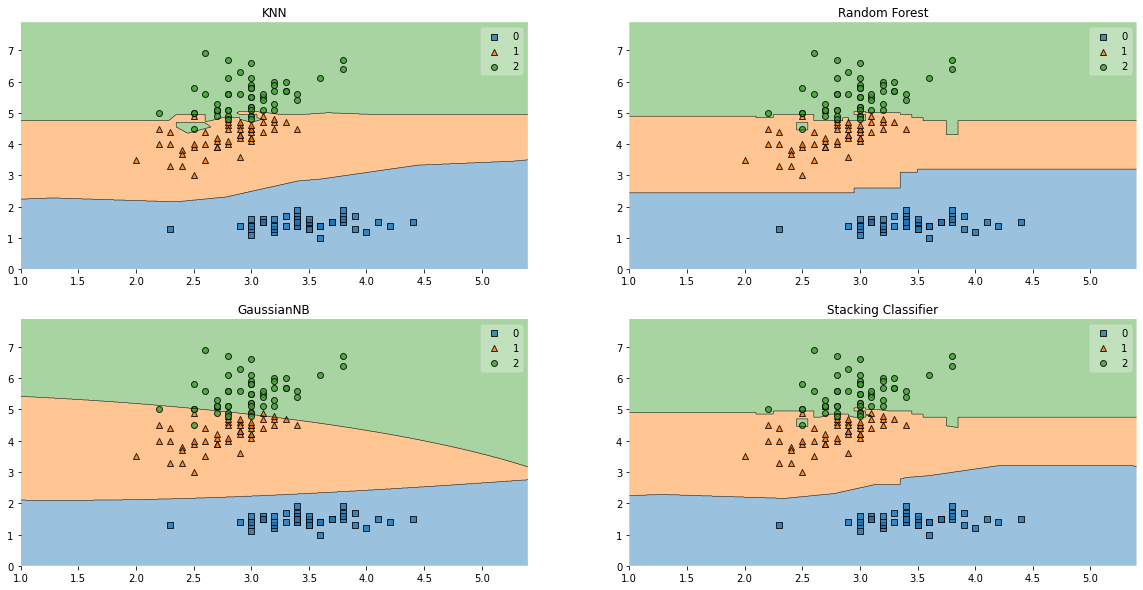

In [46]:
label = ['KNN', 'Random Forest', 'GaussianNB', 'Stacking Classifier']
clf_list = [clf1,clf2,clf3,sclf]

fig = plt.figure(figsize = (20,10))
gs = gridspec.GridSpec(2,2)
grid = itertools.product([0,1],repeat = 2)

clf_cv_mean = []
clf_cv_std = []


for clf, label, grd in zip(clf_list, label, grid):
    scores = cross_val_score(clf, X, y , cv = 15, scoring='accuracy')
    print('Accuracy: %.2f (+- %.2f) [%s]' %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
    
    clf.fit(X,y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X,y=y,clf=clf);
    plt.title(label)

plt.show()

The stacking ensemble illustrated above consists of KNN, Random Forest, Naive Bayes as base classifiers whose predictions are combined by Logistic Regression as a meta-classifier.  We can note the blending of the decision boundaries achieved by the stackign classifier.

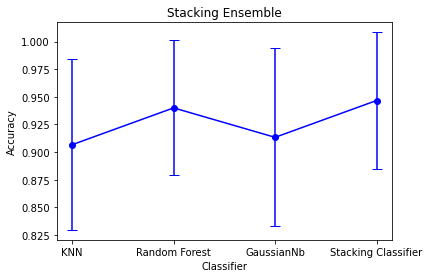

In [48]:
#plotting the classifier accuracy

plt.figure()
(__, caps, __) = plt.errorbar(range(4), clf_cv_mean, yerr = clf_cv_std, c = 'blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)

plt.xticks(range(4), ['KNN','Random Forest', 'GaussianNb', 'Stacking Classifier'])
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');


The stacking classifier marginally improves over Random Forest classifier.

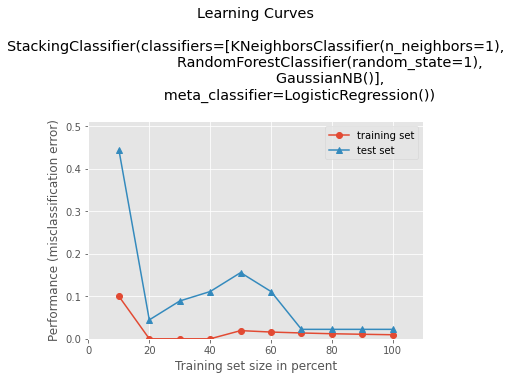

In [56]:
#plotting the learning curves for the stacking classifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 42)
plt.figure()
plot_learning_curves(X_train,y_train,X_test,y_test, sclf, print_model=True, style='ggplot');

We see stacking clearly achieves higher accuracy than individual classifiers and based on learning curves, shows no overfitting.